#Actividad: Regresión Lineal
Andrés Alejandro Guzmán González - A01633819

##Instrucciones:
Utiliza un modelo de regresión lineal múltiple para predecir el salario en dolares (salary_in_usd) de cada empleado. Las variables regresoras de tu modelo deben de ser las siguientes: nivel de experiencia (experience_level), tipo de empleo (employment_type), salario (salary) y radio remoto (remote_ratio).

Entrega un documento en formato PDF donde se observe la siguiente información.

1. Ecuación matemática que describe el modelo de regresión lineal a ejecutar. Se debe especificar el nombre de las variables.

2. Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

3. Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

4. Calculo de R^2, calculo de los coeficientes de regresión y p-valor; interpretación de resultados.

5. Comparación entre datos reales y predicción. Análisis de los resultados.

6. Análisis de los errores mediante diferentes medios (QQ-plot, histograma, test Kolmogorov etc.). Mostrar las gráficas correspondientes y el análisis de resultados

El trabajo se realizará de forma individual. La forma de entrega será mediante un documento PDF en canvas.
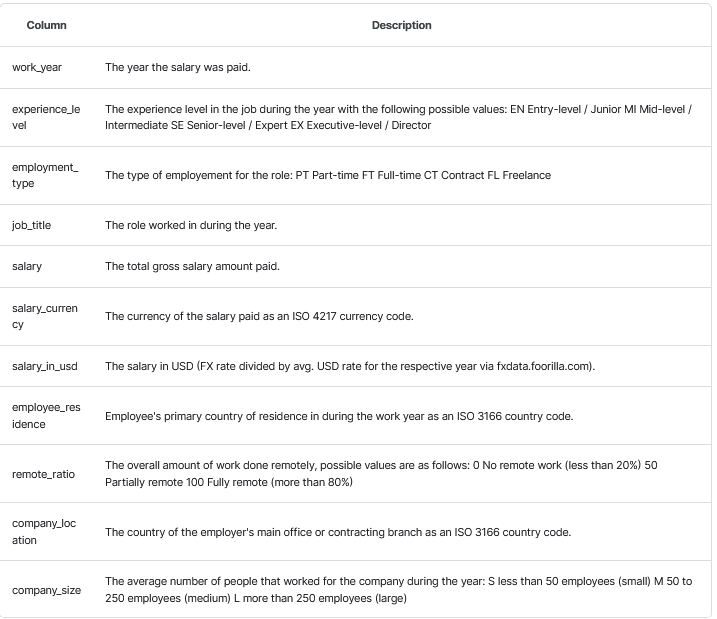

In [ ]:
#importación y llamado a librarías

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.api as sm
from scipy import stats

# Lectura del Data Frame
df = pd.read_csv('/content/sample_data/ds_salaries.csv')
# Validación de la lectura del Data Frame
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Consultamos el tamaño del Data Frame
df.shape

(607, 12)

In [ ]:
# Validadmos que no haya valores faltantes o nulos
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Quitamos la columna: 'Unnamed: 0'

In [ ]:
# Quitamos del Data Frame las variables que no vamos a considerar en el modelo
df.drop('work_year', axis=1, inplace=True)
df.drop('job_title', axis=1, inplace=True)
df.drop('salary_currency', axis=1, inplace=True)
df.drop('employee_residence', axis=1, inplace=True)
df.drop('company_location', axis=1, inplace=True)
df.drop('company_size', axis=1, inplace=True)
df.head()

,Unnamed: 0,experience_level,employment_type,salary,salary_in_usd,remote_ratio
0,0,MI,FT,70000,79833,0
1,1,SE,FT,260000,260000,0
2,2,SE,FT,85000,109024,50
3,3,MI,FT,20000,20000,0
4,4,SE,FT,150000,150000,50


In [ ]:
# Revisamos las categorías de la variable: 'experience_level'
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
# Revisamos las categorías de la variable: 'experience_level'
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
# Creamos las dummies de la variable categórica: 'experience_level'
dummies_exp_lev=pd.get_dummies(df['experience_level'], prefix='experience_level')
dummies_exp_lev

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
602,0,0,0,1
603,0,0,0,1
604,0,0,0,1
605,0,0,0,1


In [ ]:
# Creamos las dummies de la variable categórica: 'employment_type'
dummies_emp_ty=pd.get_dummies(df['employment_type'], prefix='employment_type')
dummies_emp_ty

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
602,0,0,1,0
603,0,0,1,0
604,0,0,1,0
605,0,0,1,0


In [ ]:
# Concatenamos las dummies al Data Frame
df = pd.concat([df,dummies_exp_lev, dummies_emp_ty],axis=1)
df

,Unnamed: 0,experience_level,employment_type,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,MI,FT,70000,79833,0,0,0,1,0,0,0,1,0
1,1,SE,FT,260000,260000,0,0,0,0,1,0,0,1,0
2,2,SE,FT,85000,109024,50,0,0,0,1,0,0,1,0
3,3,MI,FT,20000,20000,0,0,0,1,0,0,0,1,0
4,4,SE,FT,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,SE,FT,154000,154000,100,0,0,0,1,0,0,1,0
603,603,SE,FT,126000,126000,100,0,0,0,1,0,0,1,0
604,604,SE,FT,129000,129000,0,0,0,0,1,0,0,1,0
605,605,SE,FT,150000,150000,100,0,0,0,1,0,0,1,0


In [ ]:
# Eliminamos del Data Frame las variables 'employment_type' - 'experience_level'
df.drop('employment_type', axis = 1, inplace = True)
df.drop('experience_level', axis = 1, inplace = True)
df

,Unnamed: 0,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,0,70000,79833,0,0,0,1,0,0,0,1,0
1,1,260000,260000,0,0,0,0,1,0,0,1,0
2,2,85000,109024,50,0,0,0,1,0,0,1,0
3,3,20000,20000,0,0,0,1,0,0,0,1,0
4,4,150000,150000,50,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,154000,154000,100,0,0,0,1,0,0,1,0
603,603,126000,126000,100,0,0,0,1,0,0,1,0
604,604,129000,129000,0,0,0,0,1,0,0,1,0
605,605,150000,150000,100,0,0,0,1,0,0,1,0


In [ ]:
# Calculamos la correlación de las variables del modelo
correlacion = df.corr()
correlacion

,Unnamed: 0,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
Unnamed: 0,1.000000,-0.096250,0.167025,0.095000,-0.199319,-0.053909,-0.139869,0.296579,-0.042856,-0.032304,0.094812,-0.078736
salary,-0.096250,1.000000,-0.083906,-0.014608,-0.015845,0.014130,0.074626,-0.065995,-0.008268,-0.014568,0.025685,-0.020006
salary_in_usd,0.167025,-0.083906,1.000000,0.132122,-0.294196,0.259866,-0.252024,0.343513,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,0.095000,-0.014608,0.132122,1.000000,-0.010490,0.041208,-0.127850,0.113071,0.065149,-0.016865,-0.023834,-0.002935
experience_level_EN,-0.199319,-0.015845,-0.294196,-0.010490,1.000000,-0.087108,-0.302761,-0.381033,0.066013,-0.033537,-0.167828,0.204028
experience_level_EX,-0.053909,0.014130,0.259866,0.041208,-0.087108,1.000000,-0.155539,-0.195751,0.070739,-0.017229,-0.008698,-0.027379
experience_level_MI,-0.139869,0.074626,-0.252024,-0.127850,-0.302761,-0.155539,1.000000,-0.680373,-0.028817,0.068108,-0.006597,-0.013805
experience_level_SE,0.296579,-0.065995,0.343513,0.113071,-0.381033,-0.195751,-0.680373,1.000000,-0.047768,-0.034520,0.128381,-0.119762
employment_type_CT,-0.042856,-0.008268,0.092907,0.065149,0.066013,0.070739,-0.028817,-0.047768,1.000000,-0.007423,-0.506989,-0.011795
employment_type_FL,-0.032304,-0.014568,-0.073863,-0.016865,-0.033537,-0.017229,0.068108,-0.034520,-0.007423,1.000000,-0.453089,-0.010541


In [ ]:
# Validamos cuántas variables del modelo tienen alta correlación
alt_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alt_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# Validamos cuántas variables del modelo tienen baja correlación
baja_corr = np.where((correlacion < -0.95) & (correlacion > -1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
# Estandarizamos los valores de las variables dummies para evitar la correlación entre estas
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)
df_estandar

array([[-1.72919969, -0.16460538, -0.45790445, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-1.72349276, -0.0414754 ,  2.08328151, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [-1.71778583, -0.15488459, -0.04617667, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       ...,
       [ 1.71778583, -0.12637028,  0.2355771 , ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [ 1.72349276, -0.11276118,  0.53177399, ..., -0.0814463 ,
         0.17975796, -0.12942341],
       [ 1.72919969, -0.08035855,  1.23700468, ..., -0.0814463 ,
         0.17975796, -0.12942341]])

In [ ]:
# Insertamos los valores de la estandarización en las columnas del Data Frame correspondientes
df_estandar = pd.DataFrame(df_estandar, columns=df.columns)
df_estandar

,Unnamed: 0,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,-1.729200,-0.164605,-0.457904,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
1,-1.723493,-0.041475,2.083282,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
2,-1.717786,-0.154885,-0.046177,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
3,-1.712079,-0.197008,-1.301826,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
4,-1.706372,-0.112761,0.531774,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...,...
602,1.706372,-0.110169,0.588192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
603,1.712079,-0.128314,0.193263,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
604,1.717786,-0.126370,0.235577,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
605,1.723493,-0.112761,0.531774,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423


In [ ]:
# Procedemos a hacer la división del Data Frame en el conjunto de entrenamiento y prueba
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)
entrenamiento

,Unnamed: 0,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
9,-1.677837,-0.128962,0.179159,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
227,-0.433727,-0.161365,-0.333488,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
591,1.643596,-0.116096,0.459192,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
516,1.215576,-0.111141,0.567036,0.714862,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423
132,-0.975885,-0.185084,-1.042301,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.324008,-0.185991,-0.988746,-0.514377,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
106,-1.124265,-0.057677,1.059879,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
270,-0.188329,-0.162985,-0.561334,0.714862,2.428524,-0.211543,-0.735261,-0.925348,-0.091135,-0.081446,0.179758,-0.129423
435,0.753315,-0.164605,-0.291738,0.714862,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423


In [ ]:
# Hacemos el modelo de regresión lineal
# Quitamos una de las variables dummies de cada conjunto
modelo = smf.ols(formula='salary_in_usd~salary+remote_ratio+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT+employment_type_FL+employment_type_FT',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     21.37
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           8.41e-28
Time:                        23:24:41   Log-Likelihood:                -627.06
No. Observations:                 485   AIC:                             1272.
Df Residuals:                     476   BIC:                             1310.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0167    

##**Análisis de resultados del Modelo**

Una vez realizado el modelo de regresión lineal podemos identificar el valor de r^2 (Coeficinete de correlación) es 0.264. Este dato nos indica que el modelo se ajusta al conjunto de datos en un 26.4%. También se puede identificar que los valores de las variables: *remote_ratio*, *employment_type_FL* y *employment_type_FT* tienen un valor de p-valor de 0.144, 0.941 y 0.126 respectivamente. Al ser mayores a 0.05 aceptamos la hipótesis nula que iguala los coeficientes de dichas variables a 0, haciendo que no tengan impacto en el modelo. Con esto la función del modelo es:

y = -0.1455*x1 - 0.3717*x3 + 0.1902*x4 - 0.3225*x5 + 0.0980*x6

Donde :
- x1 es 'salary'
- x3 es 'experience_level_EN'
- x4 es 'experience_level_EX'
- x5 es 'experience_level_MI'
- x6 es 'employment_type_CT'


In [ ]:
# Calculamos los valores de aproximación del modelo
y_aprox = -0.1455*prueba['salary'] + 0*prueba['remote_ratio'] - 0.3717*prueba['experience_level_EN'] + 0.1902*prueba['experience_level_EX'] - 0.3225*prueba['experience_level_MI'] + 0.0980*prueba['employment_type_CT']
y_aprox

563    0.358337
289    0.358832
76    -0.313609
78     0.754617
182   -0.306254
         ...   
249    0.355532
365    0.358493
453   -0.315495
548    0.362222
235   -0.314552
Length: 122, dtype: float64

## **Análisis de errores**

Una vez generados los valores de aproximación hacemos un compartivo con los valores reales y a través de su diferencia con la aproximación podemos hacer el análisis de errores.

In [ ]:
tabla=pd.DataFrame({'Real': prueba['salary_in_usd'], 'Prediccion': y_aprox, 'Errores': prueba['salary_in_usd']-y_aprox})
tabla

,Real,Prediccion,Errores
563,0.394254,0.358337,0.035917
289,0.320205,0.358832,-0.038627
76,-0.173457,-0.313609,0.140152
78,2.224328,0.754617,1.469711
182,-1.217128,-0.306254,-0.910873
...,...,...,...
249,0.813866,0.355532,0.458334
365,0.370981,0.358493,0.012489
453,0.108636,-0.315495,0.424130
548,-0.186856,0.362222,-0.549078


### **Gráfico - valores reales vs valores predecidos**

Text(0, 0.5, 'Predicción')

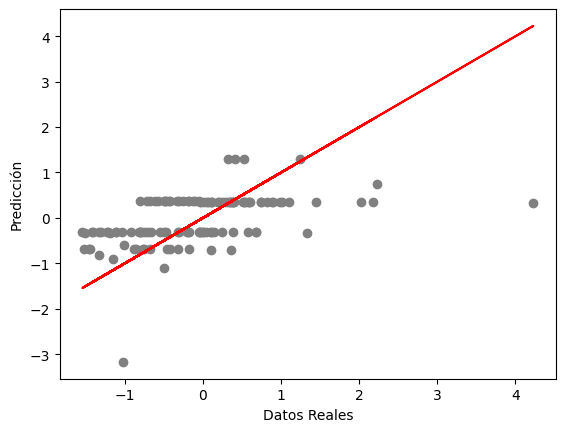

In [ ]:
plt.scatter(prueba['salary_in_usd'], y_aprox, color='gray')
plt.plot(prueba['salary_in_usd'],prueba['salary_in_usd'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("Predicción")

Al Analizar la dispersión de los datos se esperaría que estos se aproximen a la linea recta. Sin embargo, estos no siguen la línea de tendencia lo cual hace sentido por la baja correlación del modelo lo que demuestra que el modelo de regresión lineal multiple no es el mejor para predecir este conjunto de datos.

###**Gráfica de residuos**

Text(0, 0.5, 'Valor del residuo')

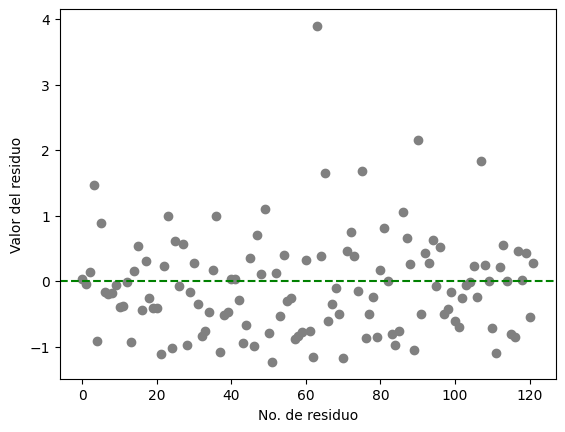

In [ ]:
plt.scatter(range(l_residuos),tabla['Errores'], color='gray')
plt.axhline(y=0, linestyle='--', color='green')
plt.xlabel("No. de residuo")
plt.ylabel("Valor del residuo")

Nuevamente con la dispersión de errores se muestra que el Data Frame no se modela adecuadamente con un modelo de regresión lineal múltiple.

### **Histograma de residuos**

Text(0, 0.5, 'Frecuencia (Probabilidad)')

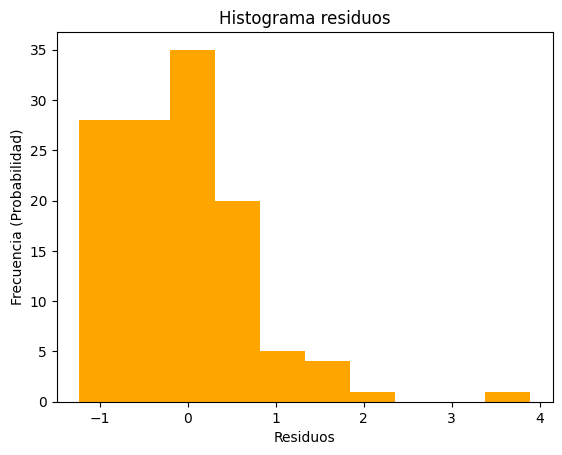

In [ ]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (Probabilidad)")

La forma del histograma nos muestra que los valores atípicos se cargan a la izquierda y afectan la distribución mostrando que los valores más pequeños tienen una mayor frecuencia.

### **QQ-Plot**

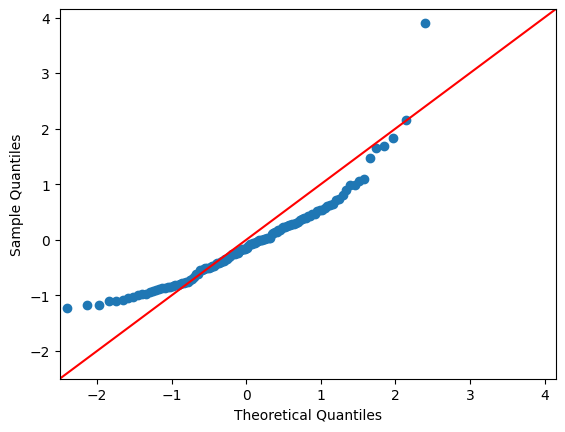

In [ ]:
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')

Para el QQ-Plot, se esperaría que los puntos se ajusten a la línea x=y. Lo que significaría que el valor de los errores es normal.

### **Modelo 2**

Una opción que podría mejorar el modelo es quitar las variables en las que se aceptó la hipótesis nula; sin embargo al analizar el resultado vemos que el coeficiente de correlación se reduce a un 25.6%, por lo que se prefirió hacer el análisis en el modelo anterior.

In [ ]:
modelo = smf.ols(formula='salary_in_usd~salary+experience_level_EN+experience_level_EX+experience_level_MI+employment_type_CT',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     33.04
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           5.65e-29
Time:                        22:26:59   Log-Likelihood:                -629.63
No. Observations:                 485   AIC:                             1271.
Df Residuals:                     479   BIC:                             1296.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0179    